# Pima stats modeling

In [30]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('../datasets/pima/diabetes.csv', index_col=False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
df['Glucose'].replace(0, np.nan, inplace=True)
df['BloodPressure'].replace(0, np.nan, inplace=True)
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['Insulin'].replace(0, np.nan, inplace=True)
df['BMI'].replace(0, np.nan, inplace=True)

In [34]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df['Diabetes'] = df['DiabetesPedigreeFunction']
df.drop('DiabetesPedigreeFunction', axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,Diabetes
0,6,148.0,72.0,35.0,NaN,33.6,50,1,0.627
1,1,85.0,66.0,29.0,NaN,26.6,31,0,0.351
2,8,183.0,64.0,NaN,NaN,23.3,32,1,0.672
3,1,89.0,66.0,23.0,94.0,28.1,21,0,0.167
4,0,137.0,40.0,35.0,168.0,43.1,33,1,2.288
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,63,0,0.171
764,2,122.0,70.0,27.0,NaN,36.8,27,0,0.340
765,5,121.0,72.0,23.0,112.0,26.2,30,0,0.245
766,1,126.0,60.0,NaN,NaN,30.1,47,1,0.349


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


[Text(0, 0, '500'), Text(0, 0, '268')]

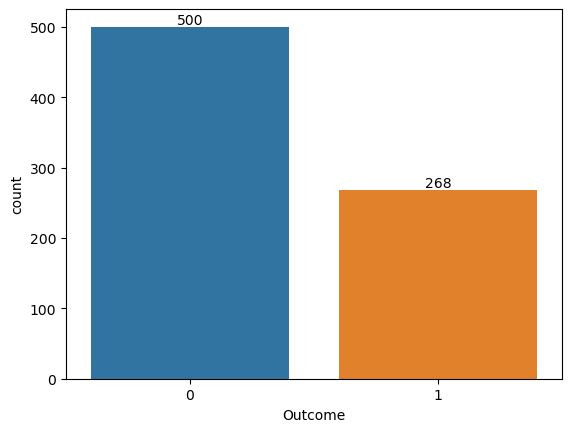

In [36]:
ax = sns.countplot(data=df, x='Outcome')
ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

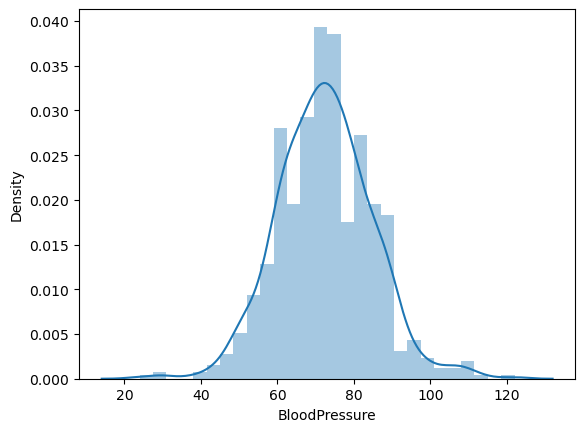

In [37]:
sns.distplot(df['BloodPressure'])

In [40]:
df = df.dropna(subset='BloodPressure')
df['BloodPressure'].sort_values()

597     24.0
18      30.0
125     30.0
599     38.0
4       40.0
       ...  
549    110.0
177    110.0
43     110.0
691    114.0
106    122.0
Name: BloodPressure, Length: 733, dtype: float64

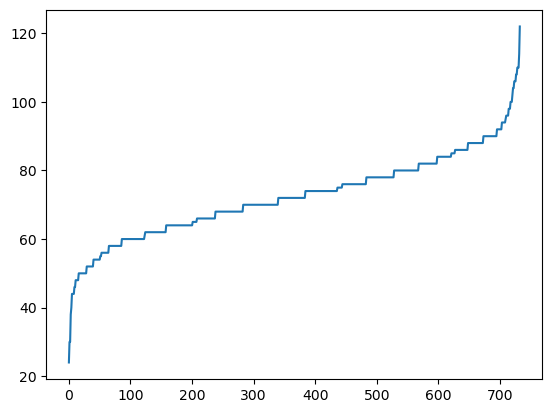

In [43]:
# df.dropna(subset='BloodPressure')
plt.plot(list(df['BloodPressure'].sort_values()))

<AxesSubplot:xlabel='BloodPressure', ylabel='Diabetes'>

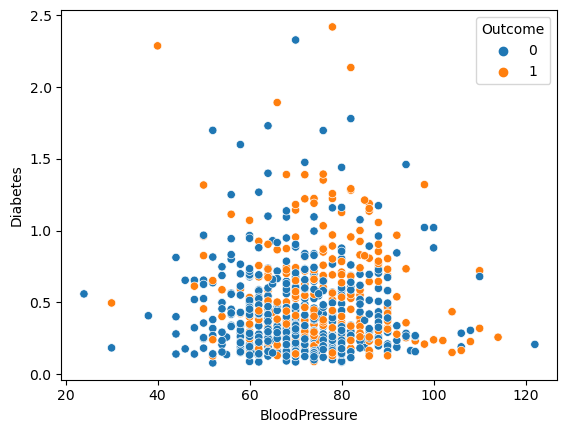

In [46]:
sns.scatterplot(y=df['Diabetes'],x=df['BloodPressure'],hue=df['Outcome'])

In [3]:
y, X = dmatrices('Outcome ~ Pregnancies + Glucose + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age', data=df, return_type='dataframe')

In [4]:
X[:3]

,Intercept,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,6.0,148.0,35.0,0.0,33.6,0.627,50.0
1,1.0,1.0,85.0,29.0,0.0,26.6,0.351,31.0
2,1.0,8.0,183.0,0.0,0.0,23.3,0.672,32.0


In [5]:
mod = sm.Logit(y, X)    # Describe model

logreg = mod.fit()       # Fit model

print(logreg.summary())   # Summarize model

Optimization terminated successfully.
         Current function value: 0.475256
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.2652
Time:                        16:24:33   Log-Likelihood:                -365.00
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.713e-53
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.8369      0.705    -12.542      0.000     -10.218

In [11]:
sm.stats.linear_rainbow(logreg)

AttributeError: 'LogitResults' object has no attribute 'ssr'